# EDA

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_palette('magma')

In [34]:
df = pd.read_csv('PimaDiabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
745,12,100,84,33,105,30.0,0.488,46,0
746,1,147,94,41,0,49.3,0.358,27,1
747,1,81,74,41,57,46.3,1.096,32,0
748,3,187,70,22,200,36.4,0.408,36,1


In [35]:
info=pd.DataFrame(df.dtypes).T.rename(index={0:'Data type'})
info=info.append(pd.DataFrame(df.shape[0] - df.isna().sum()).T.rename(index={0:'Non null values count'}))
info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Data type,int64,int64,int64,int64,int64,float64,float64,int64,int64
Non null values count,750,750,750,750,750,750,750,750,750


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667,0.346667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872,0.476226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This method generates descriptive statistics that summarize central tendency (mean), dispersion and shape of dataset excluding null values of numeric attributes.
In some attributes, the minimum value is zero (0). Since it doesnt make sense, thus it indicates missing value. 

In [37]:
grouped_ = df.groupby(["Outcome"]).mean().reset_index()
grouped_

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,0,3.281633,110.008163,68.118367,19.536735,69.416327,30.286531,0.432278,31.181633
1,1,4.903846,140.957692,70.611538,22.284615,101.038462,35.111154,0.551315,36.907692


In [38]:
replacements = {0: np.nan}
df_copy = df.copy()
df_copy['SkinThickness'].replace(replacements, inplace=True)
df_copy['Glucose'].replace(replacements, inplace=True)
df_copy['BloodPressure'].replace(replacements, inplace=True)
df_copy['Insulin'].replace(replacements, inplace=True)
df_copy['BMI'].replace(replacements, inplace=True)

info=pd.DataFrame(df_copy.isna().sum()).T.rename(index={0:'Null values count'})
info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Null values count,0,5,35,221,362,11,0,0,0


In [49]:
import matplotlib.pyplot as plt

data_dia = df['Outcome']
data = df.drop(['Outcome'], axis=1)
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([data_n_2.iloc[:,0:8],data_dia],axis=1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,0.639746,0.851435,0.154665,0.911541,-0.698828,0.206995,0.462051,1.437656,1
1,-0.843896,-1.116106,-0.152888,0.534629,-0.698828,-0.676018,-0.368976,-0.185045,0
2,1.233203,1.944513,-0.255406,-1.287113,-0.698828,-1.092296,0.597544,-0.099640,1
3,-0.843896,-0.991182,-0.152888,0.157717,0.118427,-0.486801,-0.922993,-1.039098,0
4,-1.140624,0.507896,-1.485619,0.911541,0.761797,1.405371,5.463263,-0.014234,1
...,...,...,...,...,...,...,...,...,...
745,2.420117,-0.647644,0.769772,0.785904,0.214063,-0.247126,0.043527,1.096035,0
746,-0.843896,0.820204,1.282361,1.288453,-0.698828,2.187468,-0.347899,-0.526666,1
747,-0.843896,-1.241029,0.257183,1.288453,-0.203259,1.809034,1.874193,-0.099640,0
748,-0.250439,2.069436,0.052147,0.094898,1.040012,0.560201,-0.197351,0.241982,1


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigree'),
  Text(7, 0, 'Age')])

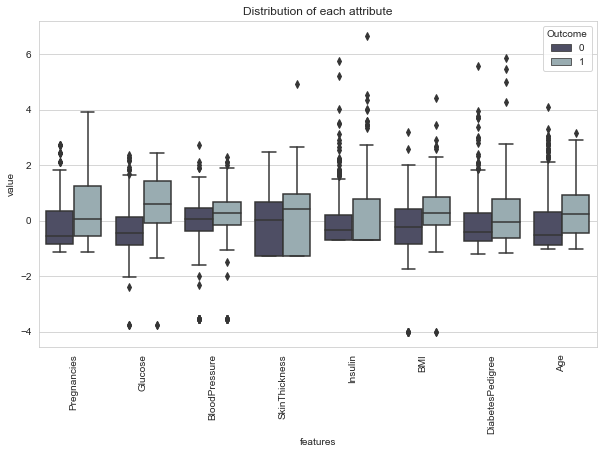

In [50]:
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,6))
sns.boxplot(x="features", y="value", hue="Outcome", data=data, palette='bone')
plt.title("Distribution of each attribute")
plt.xticks(rotation=90)

In [129]:
def create_box_hist(df, x, hue):
    variable = df[x].values
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 2)}, figsize=(5,6))
    
    mean = df[x].mean()
    q1 = df[x].quantile(0.25)
    q2 = df[x].quantile(0.5)
    q3 = df[x].quantile(0.75)
    
    sns.boxplot(data=df, x=variable, ax=ax_box)
    ax_box.axvline(mean, color='orange', linestyle='-', linewidth=2)
    ax_box.axvline(q1, color='black', linestyle='--')
    ax_box.axvline(q2, color='#003060', linestyle='--')
    ax_box.axvline(q3, color='grey', linestyle='--')
    
    sns.histplot(data=df, x=x, kde=True, hue=hue)
    ax_hist.axvline(mean, color='orange', linestyle='-', label='Mean')
    ax_hist.axvline(q1, color='black', linestyle='--', label='Q1')
    ax_hist.axvline(q2, color='#003060', linestyle='--', label='Q2')
    ax_hist.axvline(q3, color='grey', linestyle='--', label='Q3')
    
    #ax_hist.legend()
    fig.suptitle("Distribution of data in {}".format(x))
    plt.show()

## Pregnancies

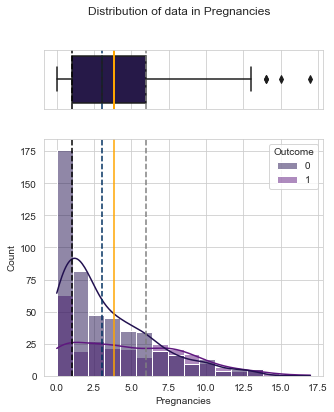

In [130]:
create_box_hist(df, 'Pregnancies', 'Outcome')

In [12]:
pd.DataFrame(df['Pregnancies'].value_counts().sort_values(ascending=False)).T

,1,0,2,3,4,5,6,7,8,9,10,11,13,12,14,15,17
Pregnancies,130,109,101,74,67,56,49,44,37,26,23,11,10,9,2,1,1


Most patients had 1, 0, and 2 pregnancies, and there was one patient who had 17 pregnancies. Basen on the boxplot, there three pregnancies count that are considered as outliers. There are positive correlation between Pregnancies and Outcome.
The distribution of the data is skewed to the right, centered at about 1.

## Outcome

Text(0.5, 0.98, 'Ratio of label 0 and 1 in the dataset')

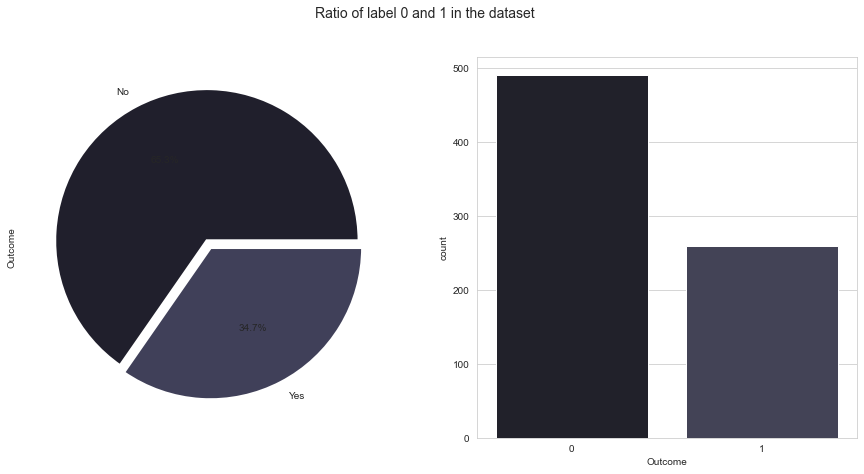

In [43]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

df["Outcome"].value_counts().plot.pie(explode=[0.05, 0], autopct="%1.1f%%",  labels=["No", "Yes"], ax=ax[0], wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
ax[1] = sns.countplot(df['Outcome'], label='Count')
fig.suptitle('Ratio of label 0 and 1 in the dataset', fontsize=14)

65.3% patients in the dataset have diabetes, and the rest don't have diabetes

## Glucose

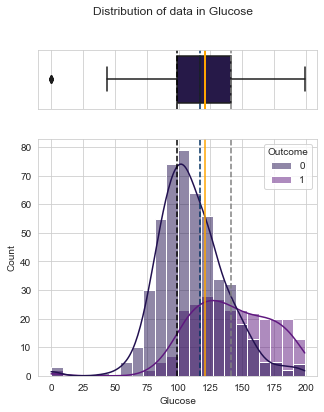

In [131]:
create_box_hist(df, 'Glucose', 'Outcome')

The mean and median of this attribute is quite close to each other, thus the distribution is considered uniform because it is roughly bell shaped and centered at about 110.
In the boxplot, 0 value is considered as outlier in the lower end.
As the value of Glucose increases, the count of patients that are diagnosed with diabetes also increases. So there is a positive linear correlation between Glucose and Outcome.
Also, starting from Glucose = 150 the amount of patient diagnosed with diabetes is more than the non-diagnosed one.

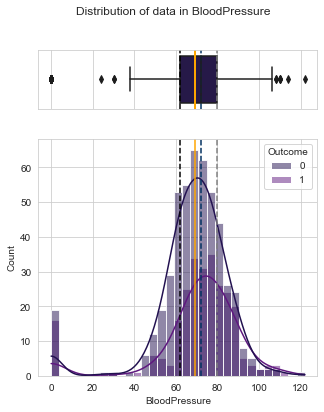

In [132]:
create_box_hist(df, 'BloodPressure', 'Outcome')

The distribution is unimodal and bell shaped.
There are more 35 rows with 0 value on the lower end, and two data points that are considered outliers. The distribution is uniforn because mean and median are close to each other.
It is hard to say there is neither positive nor negative correlation between BloodPressure and Outcome because the Outcome value don't increase as the BloodPressure increases. However, after BloodPressure = 100 there are more people diagnosed with diabetes than the non-diagnosed.

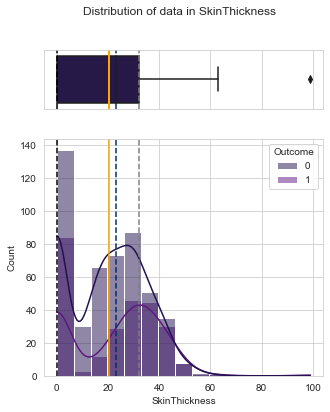

In [133]:
create_box_hist(df, 'SkinThickness', 'Outcome')

In [52]:
pd.DataFrame(df['SkinThickness'].value_counts().sort_values(ascending=False)[0:10]).T

,0,32,30,27,23,28,18,33,19,31
SkinThickness,221,30,27,22,21,20,20,20,18,17


From the histplot and table that shows 10 most frequent values in `SkinThickness`, it is known that there are 221 data with 0 value. It causes the distribution to be skewed to the left that the first quantiles is equal to 0.
There is no correlation, neither positive nor negative between SkinThickness and Outcome.

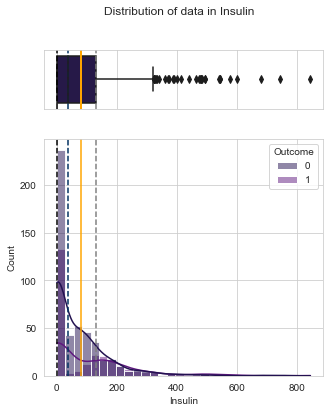

In [134]:
create_box_hist(df, 'Insulin', 'Outcome')

In [54]:
pd.DataFrame(df['Insulin'].value_counts().sort_values(ascending=False)[0:5]).T

,0,105,130,140,120
Insulin,362,11,9,9,8


The histogram is skewed, and there are 362 out of 750 data that have 0 value. 
There is no correlation between Insulin and Outcome. But at some point where Insulin > 100, there are more patients diagnosed with diabetes than the non-diagnosed one.

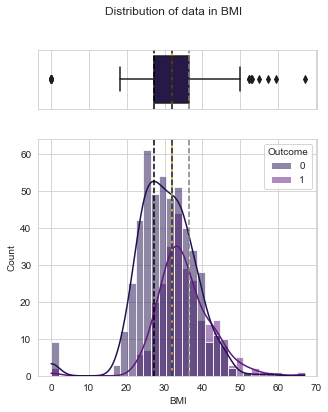

In [135]:
create_box_hist(df, 'BMI', 'Outcome')

In [56]:
pd.DataFrame(df['BMI'].value_counts().sort_values(ascending=False)).T

,31.6,32.0,0.0,31.2,33.3,32.4,30.8,32.8,30.1,32.9,...,21.2,26.3,26.7,30.2,40.7,46.5,33.5,37.3,30.3,46.3
BMI,12,12,11,11,10,9,9,9,8,8,...,1,1,1,1,1,1,1,1,1,1


The median and mean are close to each other, thus the distribution is symmetric and uniform. From the table that shows the count of each data value, it is known that there are 11 data points with 0 value. These values are considered as outliers along with some data whose value is greater than 50.
There is a positive correlation between BMI and Outcome.

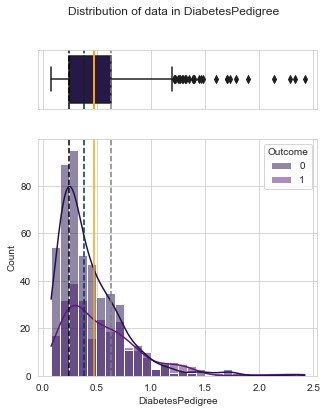

In [136]:
create_box_hist(df, 'DiabetesPedigree', 'Outcome')

The histogram is skewed to the left side, and there are many outliers whose value is greater that Q3 + IQR.

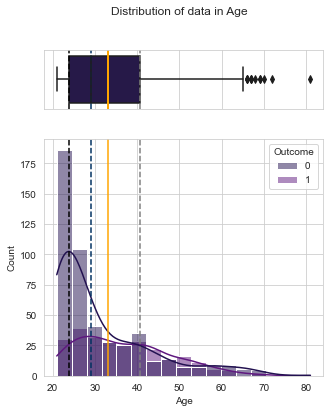

In [137]:
create_box_hist(df, 'Age', 'Outcome')

The distribution is skewed on the left side, and there are some outliers whose value is greater than Q3 + IQR.
For Age > 40, there are more people having diabetes than not having diabetes. But, this trend stopped at Age > 60.

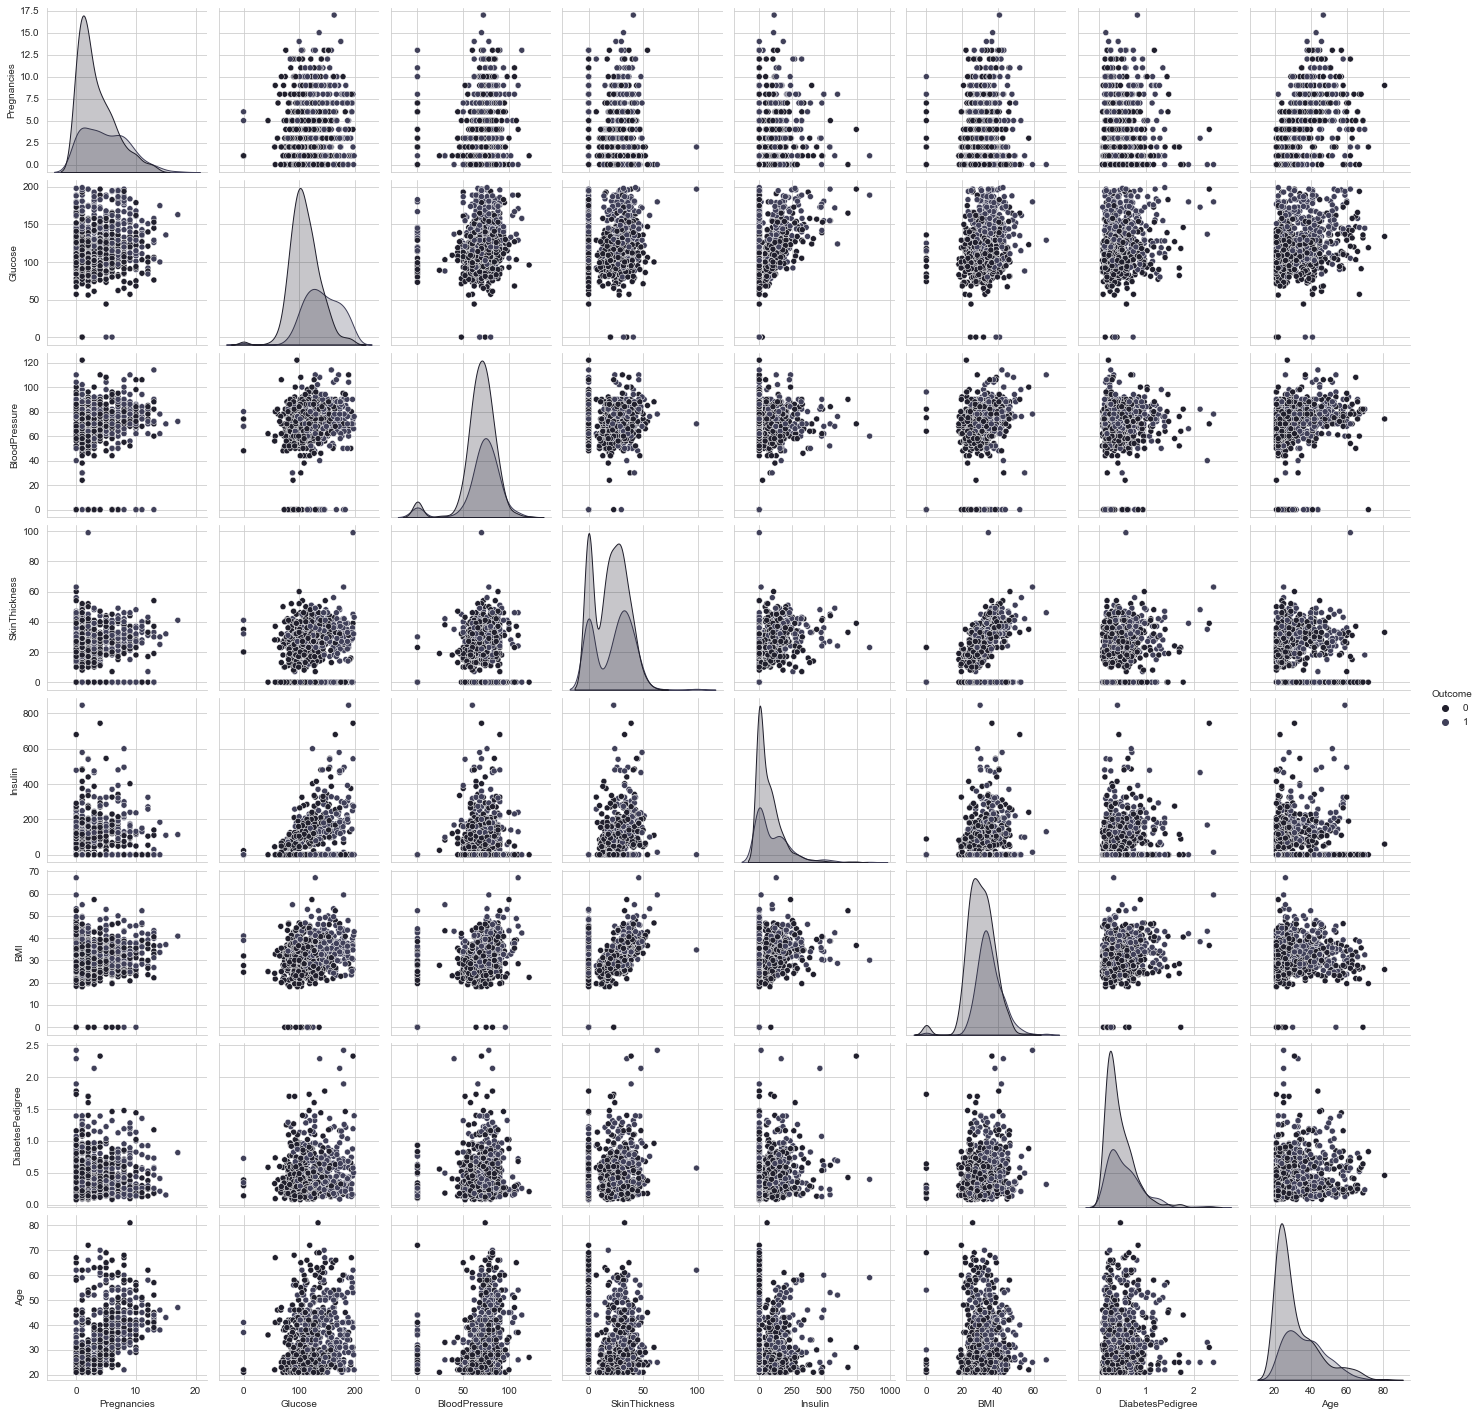

In [59]:
sns.pairplot(df, hue='Outcome')

The histogram allows us to see the distribution of single variable, while the scatterplot shows the relationship between two variables. As shown in Figure above, pregnancies, Insulin, DiabetesPedigree, and Age have skewed distribution due to the presence of outliers.

According to each scatter plot, the data points are not linearly separable. Because data points are spread non linear, Fitting tree based models might help us to get better accuracy or SVC with Non Linear Dicision Boundry.

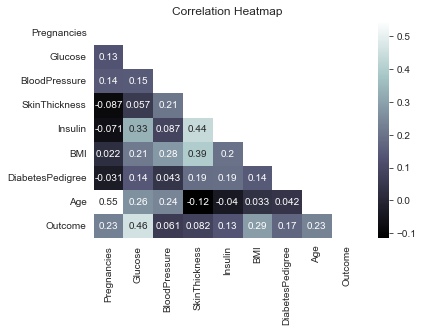

In [47]:
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
ax = sns.heatmap(df.corr(), annot=True, mask=mask, cmap='bone')
plt.title('Correlation Heatmap')
plt.show()

From heatmap above, it can be observed that there is no attribute that has negative correlation with outcome, Glucose has the highest linear correlation with Outcome, and BloodPressure has the lowest linear correlation with Outcome. Correlation coefficient score 1 or -1 means that both attribute are highly correlated meanwhile 0 means no correlation.

# Missing Values

In [ ]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
#df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
#df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

Model performance:
- Confusion matrix
- Metrics
- ROC Curve
- Precision Recall Curve

# Single Predictor

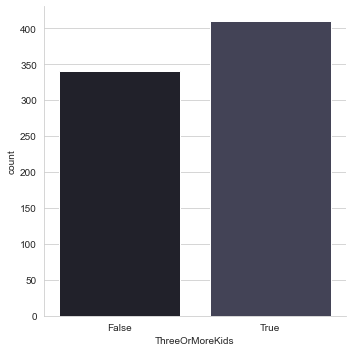

In [60]:
df['ThreeOrMoreKids'] = df['Pregnancies'] >= 3
sns.catplot(data=df, x="ThreeOrMoreKids", kind="count")

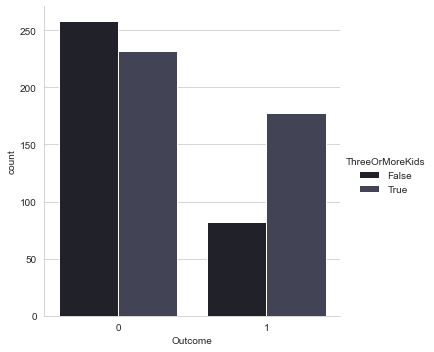

In [61]:
sns.catplot(data=df, x="Outcome", hue="ThreeOrMoreKids", kind="count",orient="v")

In [62]:
df[df['ThreeOrMoreKids'] == False]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,ThreeOrMoreKids
1,1,85,66,29,0,26.6,0.351,31,0,False
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False
8,2,197,70,45,543,30.5,0.158,53,1,False
13,1,189,60,23,846,30.1,0.398,59,1,False
...,...,...,...,...,...,...,...,...,...,...
738,2,99,60,17,160,36.6,0.453,21,0,False
739,1,102,74,0,0,39.5,0.293,42,1,False
742,1,109,58,18,116,28.5,0.219,22,0,False
746,1,147,94,41,0,49.3,0.358,27,1,False


In [63]:
from sklearn.linear_model import LogisticRegression

x1 = df['ThreeOrMoreKids'].values
y1 = df['Outcome'].values
model = LogisticRegression().fit(x1.reshape(-1,1), y1)
model.predict(x1.reshape(-1,1))

print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(x1, model.coef_))

Intercept:  [-1.13248515]
Coefficients:


[(True, array([0.85899942]))]

In [64]:
import math
a = model.intercept_
b = model.coef_

In [65]:
p_0 = (math.exp(a))/(1+(math.exp(a)))
print(p_0)

0.24370276691527734


# Regression Model

## Data Prep

In [81]:
def delete_outliers(col,df):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower, upper = Q1 - (1.5*IQR), Q3 + (1.5*IQR)
    new_df = df[(df[col] < upper) & (df[col] > lower)]
    return new_df

In [ ]:
grouped_ = df.groupby(["Outcome"]).median().reset_index()
grouped_

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,ThreeOrMoreKids
0,0,2.0,107.0,70.0,21.0,40.5,30.0,0.3375,27.0,0.0
1,1,4.0,140.0,74.0,27.0,0.0,34.2,0.4535,36.0,1.0


In [ ]:
grouped__ = df.groupby(["Outcome"]).mean().reset_index()
grouped__

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,ThreeOrMoreKids
0,0,3.281633,110.008163,68.118367,19.536735,69.416327,30.286531,0.432278,31.181633,0.473469
1,1,4.903846,140.957692,70.611538,22.284615,101.038462,35.111154,0.551315,36.907692,0.684615


In [ ]:
df = pd.read_csv("PimaDiabetes.csv")
replacements = {0: np.nan}
df['SkinThickness'].replace(replacements, inplace=True)
df['Glucose'].replace(replacements, inplace=True)
df['BloodPressure'].replace(replacements, inplace=True)
df['Insulin'].replace(replacements, inplace=True)
df['BMI'].replace(replacements, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
745,12,100.0,84.0,33.0,105.0,30.0,0.488,46,0
746,1,147.0,94.0,41.0,NaN,49.3,0.358,27,1
747,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1


In [ ]:
grouped_ = df.groupby(["Outcome"]).median().reset_index()
grouped_

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,0,2.0,107.0,70.0,27.0,102.5,30.10,0.3375,27.0
1,1,4.0,140.0,74.5,32.0,169.5,34.25,0.4535,36.0


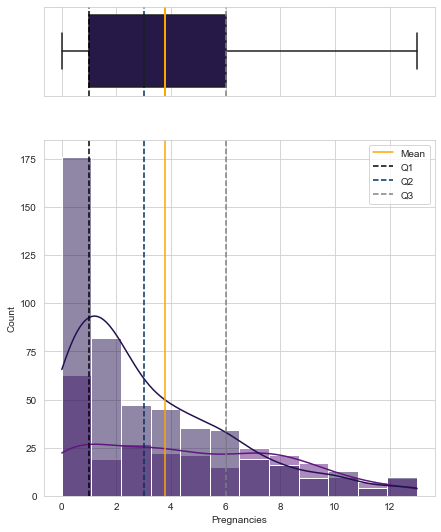

In [ ]:
#Pregnancies has outliers so

df_preg = delete_outliers('Pregnancies', df)
create_box_hist(df_preg, 'Pregnancies', 'Outcome')

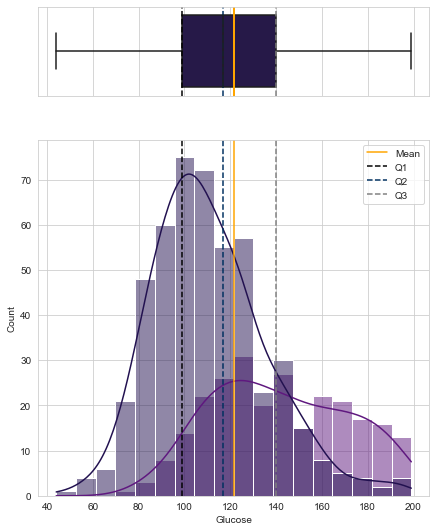

In [ ]:
#Glucose doesnt have outliers, only 0 value. So it will be replaced with median

df_glu = df_preg.copy()
df_glu.Glucose = df_preg.Glucose.replace(np.nan, df_preg.Glucose.median())
create_box_hist(df_glu, 'Glucose', 'Outcome')

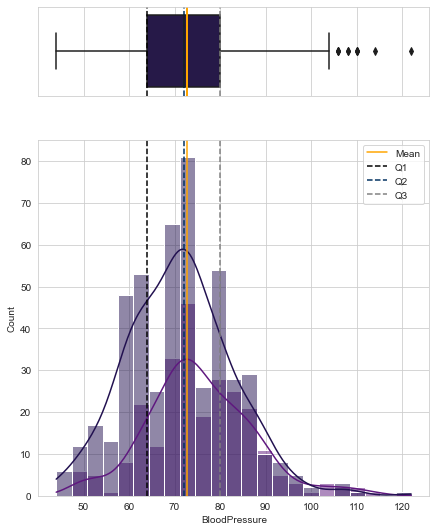

In [ ]:
df_BP = df_glu.copy()
df_BP.BloodPressure = df_glu.BloodPressure.replace(np.nan,df_glu.BloodPressure.median())

Q3 = np.percentile(df_BP['BloodPressure'], 75)
Q1 = np.percentile(df_BP['BloodPressure'], 25)

IQR = Q3 - Q1
lower = Q1 - (1.5*IQR)
df_BP = df_BP[df_BP['BloodPressure'] > lower]
create_box_hist(df_BP, 'BloodPressure', 'Outcome')

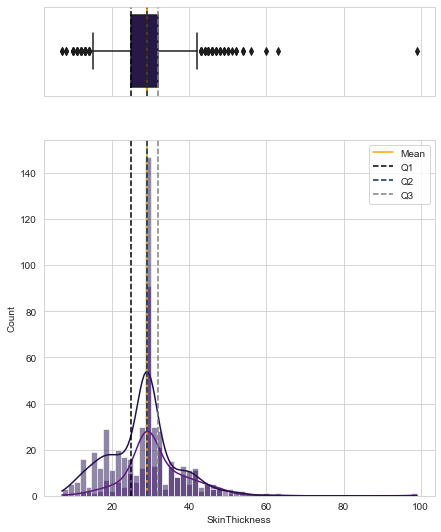

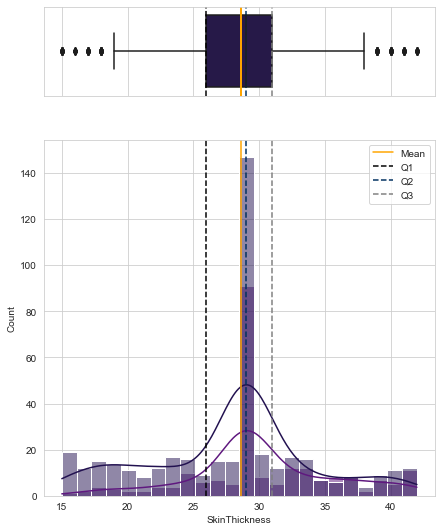

In [ ]:
df_skin = df_BP.copy()
df_skin.SkinThickness = df_BP.SkinThickness.replace(np.nan,df_BP.SkinThickness.median())
create_box_hist(df_skin, 'SkinThickness', 'Outcome')

#bisa dihapus
df_skin = delete_outliers('SkinThickness', df_skin)
create_box_hist(df_skin, 'SkinThickness', 'Outcome')

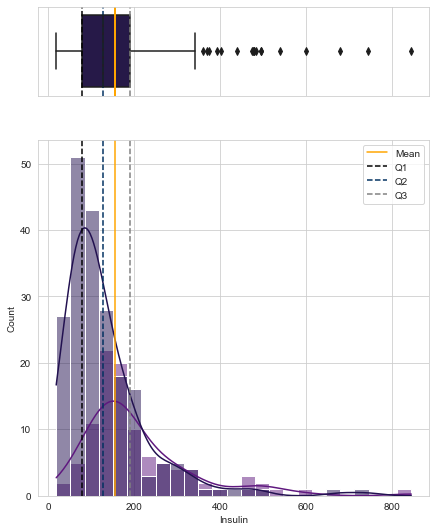

In [ ]:
df_insulin = df_skin.copy()
create_box_hist(df_insulin, 'Insulin', 'Outcome')
df_insulin.Insulin = df_insulin.Insulin.replace(np.nan,df_skin.Insulin.median())

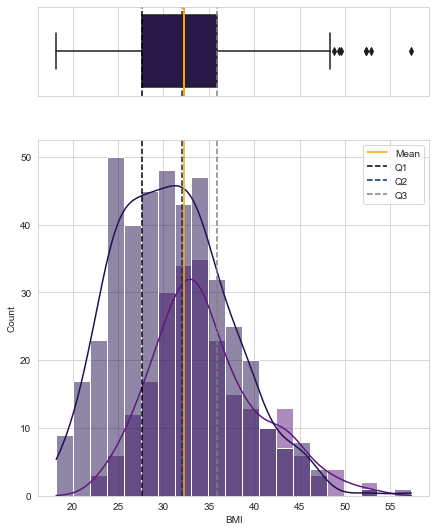

In [ ]:
df_bmi = df_insulin.copy()
df_bmi.BMI = df_insulin.BMI.replace(np.nan,df_insulin.BMI.median())
create_box_hist(df_bmi, 'BMI', 'Outcome')

In [ ]:
#df_bmi = delete_outliers('BMI', df_bmi)
#create_box_hist(df_bmi, 'BMI', 'Outcome')

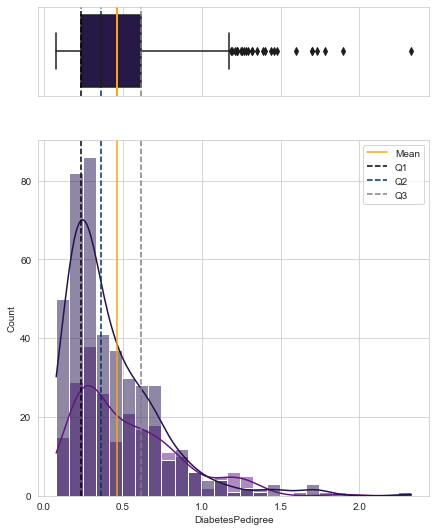

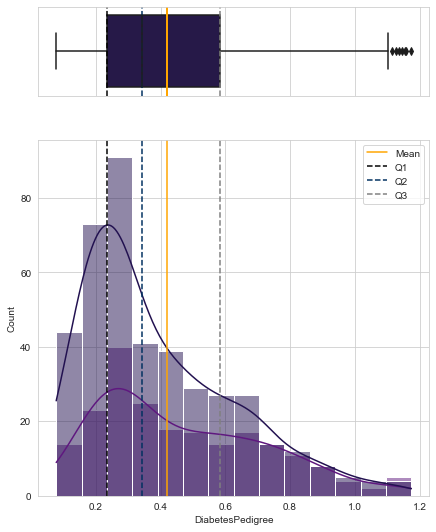

In [ ]:
df_dpf = df_bmi.copy()
df_dpf['DiabetesPedigree'] = df_bmi['DiabetesPedigree'].replace(np.nan,df_bmi['DiabetesPedigree'].median())
create_box_hist(df_dpf, 'DiabetesPedigree', 'Outcome')

df_dpf = delete_outliers('DiabetesPedigree', df_dpf)
create_box_hist(df_dpf, 'DiabetesPedigree', 'Outcome')


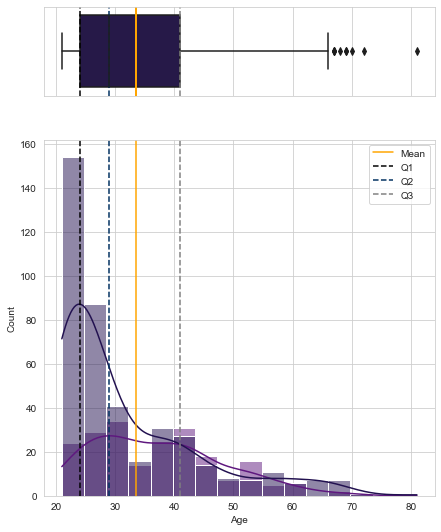

In [ ]:
df = df_dpf.copy()
df['Age'] = df_dpf['Age'].replace(0,df_dpf['Age'].median())
create_box_hist(df, 'Age', 'Outcome')

In [ ]:
## With all features as predictor

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(504, 8)
(126, 8)
(504,)
(126,)


In [ ]:
lr = LogisticRegression().fit(X_train, y_train)
lr.predict(X_test)

print("Intercept: ", lr.intercept_)
list(zip(df.columns, lr.coef_[0]))

Intercept:  [-9.12059352]


[('Pregnancies', 0.150753868572377),
 ('Glucose', 0.03715223733628808),
 ('BloodPressure', -0.006200009627792687),
 ('SkinThickness', 0.025907359732281098),
 ('Insulin', -0.0014828061399105338),
 ('BMI', 0.07390503466697503),
 ('DiabetesPedigree', 0.8976474779486768),
 ('Age', 0.00504462969828444)]

In [ ]:
from sklearn.metrics import accuracy_score

y_hat = lr.predict(X_test)
acc_lr = accuracy_score(y_hat, y_test)
acc_lr

0.753968253968254

0.6984126984126984
0.6507936507936508
Feature Ranking: [1 3 6 4 7 2 1 5]
0.6944444444444444
0.6825396825396826
Feature Ranking: [1 2 5 3 6 1 1 4]
0.7638888888888888
0.7619047619047619
Feature Ranking: [1 1 4 2 5 1 1 3]
0.7579365079365079
0.753968253968254
Feature Ranking: [1 1 3 1 4 1 1 2]
0.7638888888888888
0.753968253968254
Feature Ranking: [1 1 2 1 3 1 1 1]
0.7619047619047619
0.746031746031746
Feature Ranking: [1 1 1 1 2 1 1 1]
0.7658730158730159
0.753968253968254
Feature Ranking: [1 1 1 1 1 1 1 1]


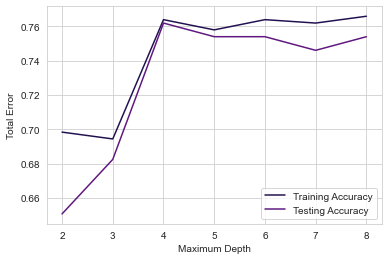

In [ ]:
from sklearn.feature_selection import RFE

train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model
for i in range(2,len(df.columns)):
    rfe = RFE(estimator=LogisticRegression(),n_features_to_select=i, verbose=0)
    rfe.fit(X_train,y_train)
    train_accs.append(accuracy_score(y_train, rfe.predict(X_train)))
    test_accs.append(accuracy_score(y_test, rfe.predict(X_test)))
    print(accuracy_score(y_train, rfe.predict(X_train)))
    print(accuracy_score(y_test, rfe.predict(X_test)))
    #print("Num Features: %d" % rfe.n_features_)
    #print("Selected Features: %s" % rfe.support_)
    print("Feature Ranking: %s" % rfe.ranking_)

x_axs2 = np.arange(1,len(df.columns)-1) + 1 # Create domain for plot
plt.plot(x_axs2, train_accs, label='Training Accuracy') # Plot training error over domain
plt.plot(x_axs2, test_accs, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model
for i in range(2,len(df.columns)):
    print(i)
    test = SelectKBest(score_func=f_classif, k=i)
    fit = test.fit(X_train, y_train)
    set_printoptions(precision=3)
    print(fit.scores_)
    features = fit.transform(X_train)

    lr = LogisticRegression().fit(features, y_train)
    pred_x = fit.transform(X_test)
    hat_y = lr.predict(pred_x)
    acc_lr = accuracy_score(hat_y, y_test)
    print(acc_lr)    

2
[ 28.417 139.774  11.553  19.688  16.037  33.719   8.705  22.318]
0.7777777777777778
3
[ 28.417 139.774  11.553  19.688  16.037  33.719   8.705  22.318]
0.7619047619047619
4
[ 28.417 139.774  11.553  19.688  16.037  33.719   8.705  22.318]
0.7619047619047619
5
[ 28.417 139.774  11.553  19.688  16.037  33.719   8.705  22.318]
0.753968253968254
6
[ 28.417 139.774  11.553  19.688  16.037  33.719   8.705  22.318]
0.753968253968254
7
[ 28.417 139.774  11.553  19.688  16.037  33.719   8.705  22.318]
0.753968253968254
8
[ 28.417 139.774  11.553  19.688  16.037  33.719   8.705  22.318]
0.753968253968254


In [ ]:
'''from sklearn.preprocessing import StandardScaler

stdscl = StandardScaler()
stdscl.fit(X_train)
X_train_ = stdscl.transform(X_train)
X_test_ = stdscl.transform(X_test)

train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model
for i in range(2,len(df.columns)):
    rfe = RFE(estimator=LogisticRegression(),n_features_to_select=i, verbose=0)
    rfe.fit(X_train_,y_train)
    train_accs.append(accuracy_score(y_train, rfe.predict(X_train_)))
    test_accs.append(accuracy_score(y_test, rfe.predict(X_test_)))
    print("Feature Ranking: %s" % rfe.ranking_)

x_axs2 = np.arange(1,len(df.columns)-1) + 1 # Create domain for plot
plt.plot(x_axs2, train_accs, label='Training Accuracy') # Plot training error over domain
plt.plot(x_axs2, test_accs, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph'''

'from sklearn.preprocessing import StandardScaler\n\nstdscl = StandardScaler()\nstdscl.fit(X_train)\nX_train_ = stdscl.transform(X_train)\nX_test_ = stdscl.transform(X_test)\n\ntrain_accs = [] # Log training errors for each model\ntest_accs = [] # Log testing errors for each model\nfor i in range(2,len(df.columns)):\n    rfe = RFE(estimator=LogisticRegression(),n_features_to_select=i, verbose=0)\n    rfe.fit(X_train_,y_train)\n    train_accs.append(accuracy_score(y_train, rfe.predict(X_train_)))\n    test_accs.append(accuracy_score(y_test, rfe.predict(X_test_)))\n    print("Feature Ranking: %s" % rfe.ranking_)\n\nx_axs2 = np.arange(1,len(df.columns)-1) + 1 # Create domain for plot\nplt.plot(x_axs2, train_accs, label=\'Training Accuracy\') # Plot training error over domain\nplt.plot(x_axs2, test_accs, label=\'Testing Accuracy\') # Plot testing error over domain\nplt.xlabel(\'Maximum Depth\') # Label x-axis\nplt.ylabel(\'Total Error\') # Label y-axis\nplt.legend() # Show plot labels as l

## Method 2

In [ ]:
df = pd.read_csv("PimaDiabetes.csv")
replacements = {0: np.nan}
df['SkinThickness'].replace(replacements, inplace=True)
df['Glucose'].replace(replacements, inplace=True)
df['BloodPressure'].replace(replacements, inplace=True)
df['Insulin'].replace(replacements, inplace=True)
df['BMI'].replace(replacements, inplace=True)

df = df.dropna()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
742,1,109.0,58.0,18.0,116.0,28.5,0.219,22,0
744,13,153.0,88.0,37.0,140.0,40.6,1.174,39,0
745,12,100.0,84.0,33.0,105.0,30.0,0.488,46,0
747,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0


In [ ]:
df['Glucose_cat'] = pd.cut(df['Glucose'], bins = [40,80,120,160,np.inf], labels=[1,2,3,4])
df['Glucose_cat'].value_counts()

2    183
3    132
4     53
1     18
Name: Glucose_cat, dtype: int64

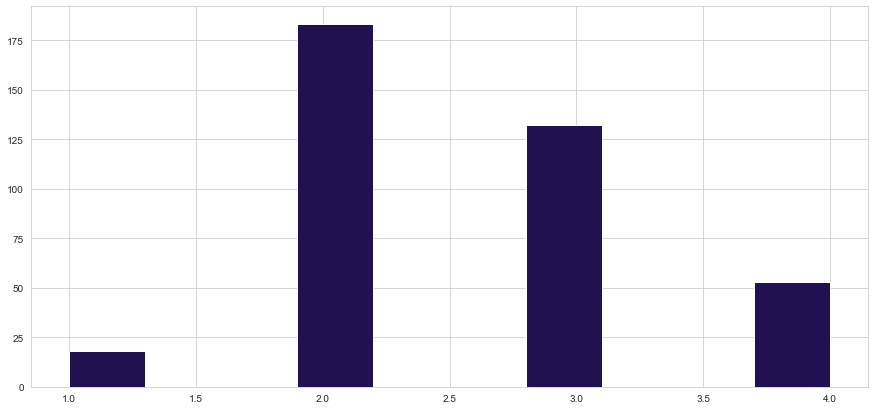

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

df_copy["Glucose_cat"].hist(ax=ax)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

df = df.reset_index(drop=True)
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,Glucose_cat
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,2
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,3
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,4
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,4
...,...,...,...,...,...,...,...,...,...,...
381,1,109.0,58.0,18.0,116.0,28.5,0.219,22,0,2
382,13,153.0,88.0,37.0,140.0,40.6,1.174,39,0,3
383,12,100.0,84.0,33.0,105.0,30.0,0.488,46,0,2
384,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0,2


In [ ]:
for train_index, test_index in split2.split(df, df["Glucose_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

def get_glucose_proportions(ndf):
    print(ndf["Glucose_cat"].value_counts() / len(ndf))

print("Entire Dataset: ")
get_glucose_proportions(df_copy)
print("\n")
print("-"*30)
print("\nTesting set: ")
get_glucose_proportions(strat_test_set)

Entire Dataset: 
2    0.474093
3    0.341969
4    0.137306
1    0.046632
Name: Glucose_cat, dtype: float64


------------------------------

Testing set: 
2    0.474359
3    0.346154
4    0.141026
1    0.038462
Name: Glucose_cat, dtype: float64


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(columns=["Glucose_cat"], inplace=True)
    
feats = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
feats = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for i in feats:
    for j in (0,1):
        strat_train_set.loc[(strat_train_set['Outcome'] == j) & (strat_train_set[i] == 0), i] = strat_train_set.loc[(strat_train_set['Outcome'] == j ), i].median()

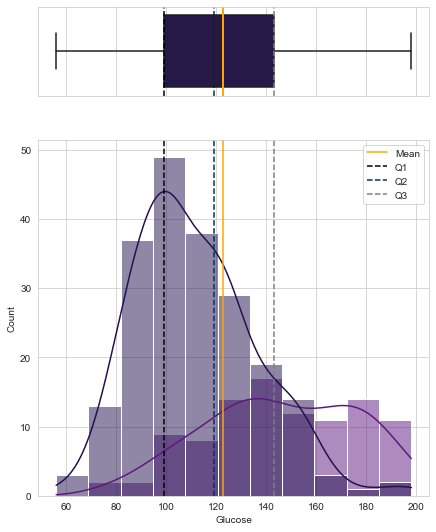

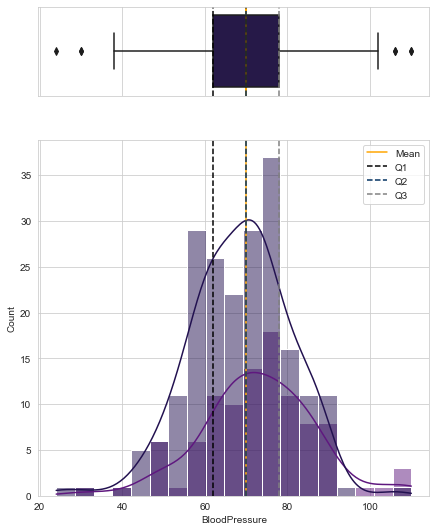

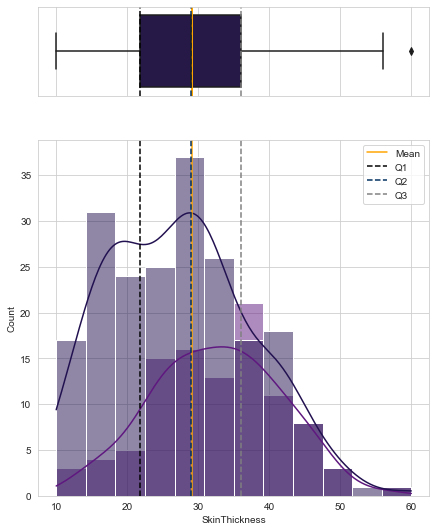

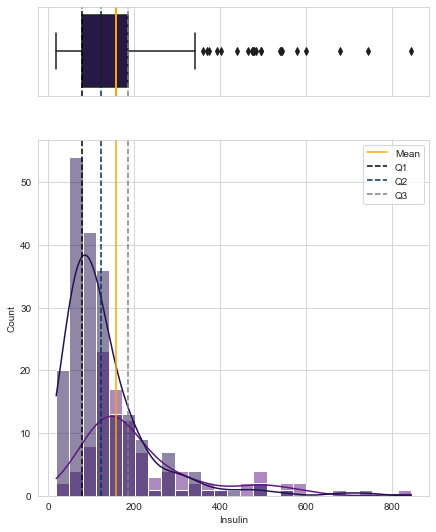

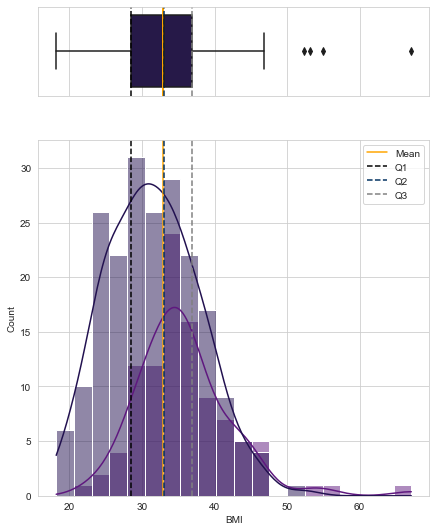

In [ ]:
for col in feats:
    create_box_hist(strat_train_set, col, 'Outcome')

In [ ]:
df_preg = delete_outliers('Pregnancies', strat_train_set)

In [ ]:
df_glu = df_preg.copy()

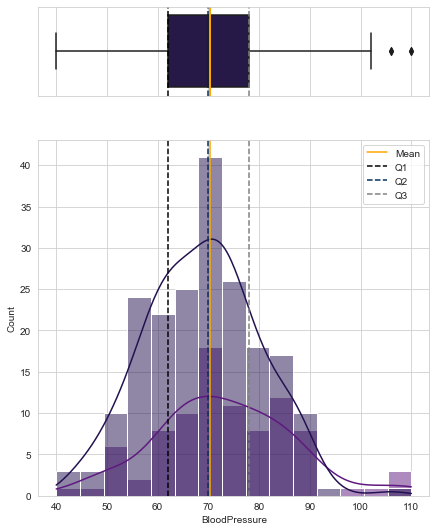

In [ ]:
df_BP = df_glu.copy()
Q3 = np.percentile(df_BP['BloodPressure'], 75)
Q1 = np.percentile(df_BP['BloodPressure'], 25)

IQR = Q3 - Q1
lower = Q1 - (1.5*IQR)
df_BP = df_BP[df_BP['BloodPressure'] > lower]
create_box_hist(df_BP, 'BloodPressure', 'Outcome')

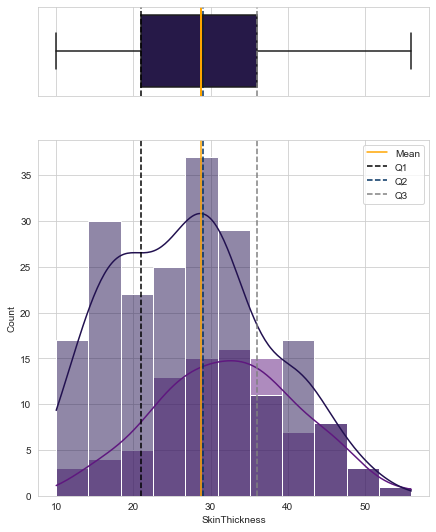

In [ ]:
df_skin = delete_outliers('SkinThickness', df_BP)
create_box_hist(df_skin, 'SkinThickness', 'Outcome')

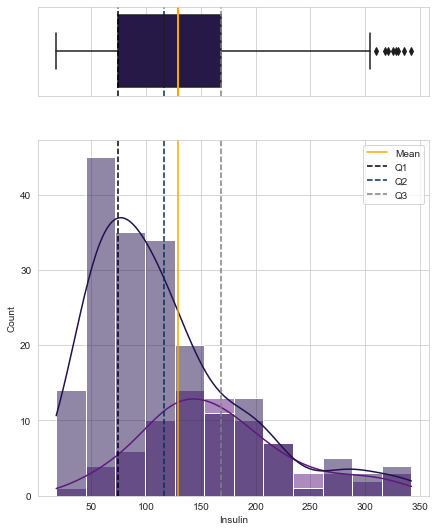

In [ ]:
df_ins = delete_outliers('Insulin', df_skin)
create_box_hist(df_ins, 'Insulin', 'Outcome')

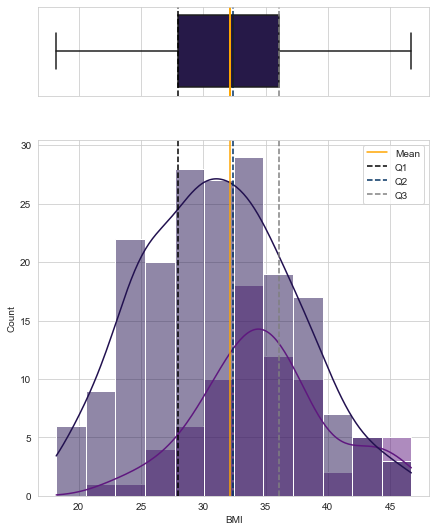

In [ ]:
df_bmi = df_ins.copy()
df_bmi = delete_outliers('BMI', df_bmi)
create_box_hist(df_bmi, 'BMI', 'Outcome')

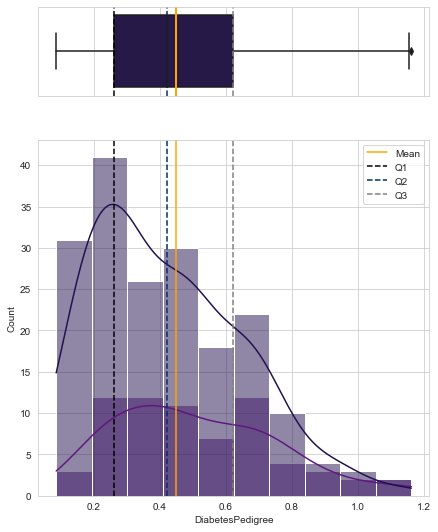

In [ ]:
df_dpf = df_bmi.copy()
df_dpf = delete_outliers('DiabetesPedigree', df_dpf)
create_box_hist(df_dpf, 'DiabetesPedigree', 'Outcome')

In [ ]:
df = df_dpf.copy()

In [ ]:
X_train = df.drop(columns="Outcome")
y_train = df["Outcome"]

X_test = strat_test_set.drop(columns="Outcome")
y_test = strat_test_set["Outcome"]

In [ ]:
from sklearn.preprocessing import StandardScaler

stdscl = StandardScaler()
stdscl.fit(X_train)
X_train_ = stdscl.transform(X_train)
X_test_ = stdscl.transform(X_test)

In [ ]:
print(X_train_.shape)
print(X_test_.shape)
print(y_train.shape)
print(y_test.shape)

(255, 8)
(78, 8)
(255,)
(78,)


In [ ]:
lr = LogisticRegression().fit(X_train_, y_train)
lr.predict(X_test)

print("Intercept: ", lr.intercept_)
list(zip(df.columns, lr.coef_[0]))

Intercept:  [-1.424]


[('Pregnancies', -0.10181165168638653),
 ('Glucose', 1.3001638943092013),
 ('BloodPressure', -0.012819957976126051),
 ('SkinThickness', 0.102112047181039),
 ('Insulin', -0.09266719209026585),
 ('BMI', 0.4692614507059751),
 ('DiabetesPedigree', 0.24986356529743337),
 ('Age', 0.2932148891900899)]

In [ ]:
from sklearn.metrics import accuracy_score

y_hat = lr.predict(X_test_)
acc_lr = accuracy_score(y_hat, y_test)
acc_lr

0.8076923076923077

In [ ]:
df_test = pd.read_csv('ToPredict.csv')
preds = lr.predict(df_test)
preds

array([1, 1, 1, 1, 1], dtype=int64)

Feature Ranking: [4 1 7 5 6 1 2 3]
Feature Ranking: [3 1 6 4 5 1 1 2]
Feature Ranking: [2 1 5 3 4 1 1 1]
Feature Ranking: [1 1 4 2 3 1 1 1]
Feature Ranking: [1 1 3 1 2 1 1 1]
Feature Ranking: [1 1 2 1 1 1 1 1]
Feature Ranking: [1 1 1 1 1 1 1 1]


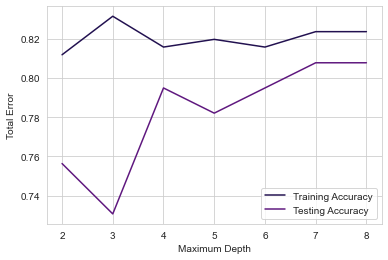

In [ ]:
from sklearn.feature_selection import RFE

train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model
for i in range(2,len(df.columns)):
    rfe = RFE(estimator=LogisticRegression(),n_features_to_select=i, verbose=0)
    rfe.fit(X_train_,y_train)
    train_accs.append(accuracy_score(y_train, rfe.predict(X_train_)))
    test_accs.append(accuracy_score(y_test, rfe.predict(X_test_)))
    #print("Num Features: %d" % rfe.n_features_)
    #print("Selected Features: %s" % rfe.support_)
    print("Feature Ranking: %s" % rfe.ranking_)

x_axs2 = np.arange(1,len(df.columns)-1) + 1 # Create domain for plot
plt.plot(x_axs2, train_accs, label='Training Accuracy') # Plot training error over domain
plt.plot(x_axs2, test_accs, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

Accuracy with 1 features: 0.74
[2.945e+01 1.571e+02 1.531e+01 5.064e+01 1.258e-01 4.490e+01 1.466e+01
 2.873e+01]
Accuracy with 2 features: 0.6933333333333334
[2.945e+01 1.571e+02 1.531e+01 5.064e+01 1.258e-01 4.490e+01 1.466e+01
 2.873e+01]
Accuracy with 3 features: 0.7133333333333334
[2.945e+01 1.571e+02 1.531e+01 5.064e+01 1.258e-01 4.490e+01 1.466e+01
 2.873e+01]
Accuracy with 4 features: 0.7333333333333333
[2.945e+01 1.571e+02 1.531e+01 5.064e+01 1.258e-01 4.490e+01 1.466e+01
 2.873e+01]
Accuracy with 5 features: 0.7266666666666667
[2.945e+01 1.571e+02 1.531e+01 5.064e+01 1.258e-01 4.490e+01 1.466e+01
 2.873e+01]
Accuracy with 6 features: 0.72
[2.945e+01 1.571e+02 1.531e+01 5.064e+01 1.258e-01 4.490e+01 1.466e+01
 2.873e+01]
Accuracy with 7 features: 0.74
[2.945e+01 1.571e+02 1.531e+01 5.064e+01 1.258e-01 4.490e+01 1.466e+01
 2.873e+01]
Accuracy with 8 features: 0.7666666666666667
[2.945e+01 1.571e+02 1.531e+01 5.064e+01 1.258e-01 4.490e+01 1.466e+01
 2.873e+01]


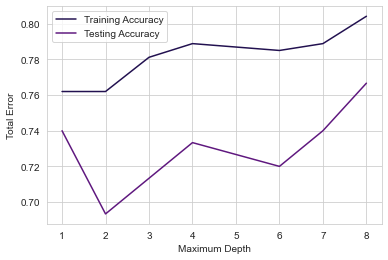

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model
for i in range(1,len(df.columns)):
    test = SelectKBest(score_func=f_classif, k=i)
    fit = test.fit(X_train_, y_train)
    set_printoptions(precision=3)
    features = fit.transform(X_train_)

    lr1 = LogisticRegression().fit(features, y_train)
    pred_x = fit.transform(X_test_)
    hat_y = lr1.predict(pred_x)
    acc_lr = accuracy_score(hat_y, y_test)
    train_accs.append(accuracy_score(y_train, lr1.predict(features)))
    test_accs.append(accuracy_score(y_test, lr1.predict(pred_x)))
    print("Accuracy with {} features: {}".format(i,acc_lr))    
    print(fit.scores_)

x_axs2 = np.arange(1,len(df.columns)) # Create domain for plot
plt.plot(x_axs2, train_accs, label='Training Accuracy') # Plot training error over domain
plt.plot(x_axs2, test_accs, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

## Method 3

In [94]:
df = pd.read_csv("PimaDiabetes.csv")

In [95]:
newdf = df
newdf['Glucose_cat'] = pd.cut(newdf['Glucose'], bins = [-1,40,80,120,160,np.inf], labels=[1,2,3,4,5])
newdf['Glucose_cat'].value_counts()

3    366
4    239
5     98
2     42
1      5
Name: Glucose_cat, dtype: int64

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(newdf, newdf["Glucose_cat"]):
    strat_train_set = newdf.loc[train_index]
    strat_test_set = newdf.loc[test_index]
def get_glucose_proportions(ndf):
    print(ndf["Glucose_cat"].value_counts() / len(ndf))

print("Entire Dataset: ")
get_glucose_proportions(newdf)
print("\n")
print("-"*30)
print("\nTesting set: ")
get_glucose_proportions(strat_test_set)

Entire Dataset: 
3    0.488000
4    0.318667
5    0.130667
2    0.056000
1    0.006667
Name: Glucose_cat, dtype: float64


------------------------------

Testing set: 
3    0.486667
4    0.320000
5    0.133333
2    0.053333
1    0.006667
Name: Glucose_cat, dtype: float64


In [97]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(columns=["Glucose_cat"], inplace=True)

X_train = strat_train_set.drop(columns="Outcome")
y_train = strat_train_set["Outcome"]

X_test = strat_test_set.drop(columns="Outcome")
y_test = strat_test_set["Outcome"]

Feature Ranking: [1 3 4 6 7 2 1 5]
Feature Ranking: [1 2 3 5 6 1 1 4]
Feature Ranking: [1 1 2 4 5 1 1 3]
Feature Ranking: [1 1 1 3 4 1 1 2]
Feature Ranking: [1 1 1 2 3 1 1 1]
Feature Ranking: [1 1 1 1 2 1 1 1]
Feature Ranking: [1 1 1 1 1 1 1 1]


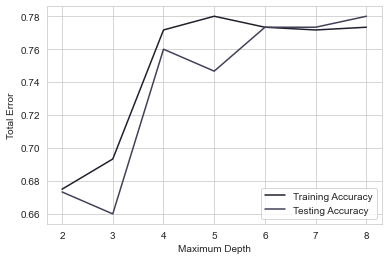

In [98]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model
for i in range(2,len(X_train.columns)+1):
    rfe = RFE(estimator=LogisticRegression(),n_features_to_select=i, verbose=0)
    rfe.fit(X_train,y_train)
    train_accs.append(accuracy_score(y_train, rfe.predict(X_train)))
    test_accs.append(accuracy_score(y_test, rfe.predict(X_test)))
    #print("Num Features: %d" % rfe.n_features_)
    #print("Selected Features: %s" % rfe.support_)
    print("Feature Ranking: %s" % rfe.ranking_)

x_axs2 = np.arange(2,len(X_train.columns)+1) # Create domain for plot
plt.plot(x_axs2, train_accs, label='Training Accuracy') # Plot training error over domain
plt.plot(x_axs2, test_accs, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

In [99]:
strat_train_set = strat_train_set.drop(['Insulin', 'SkinThickness'], axis=1)

In [100]:
strat_test_set = strat_test_set.drop(['Insulin', 'SkinThickness'], axis=1)

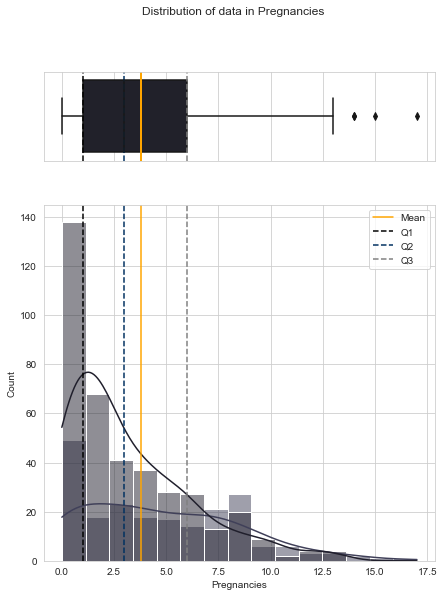

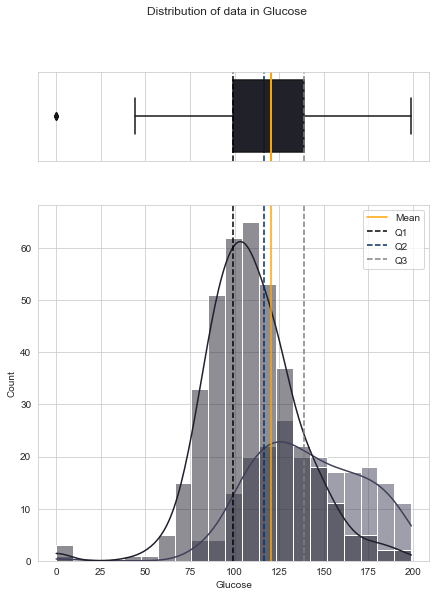

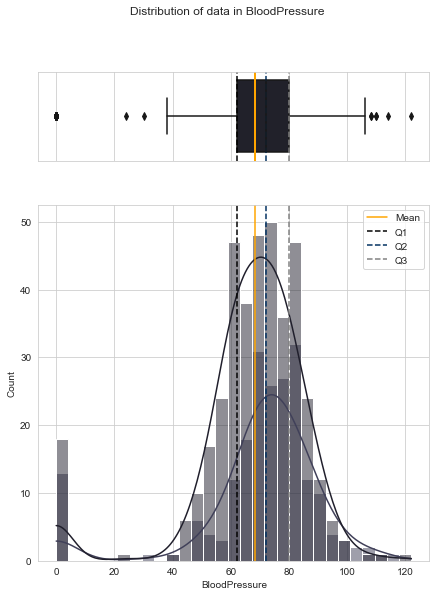

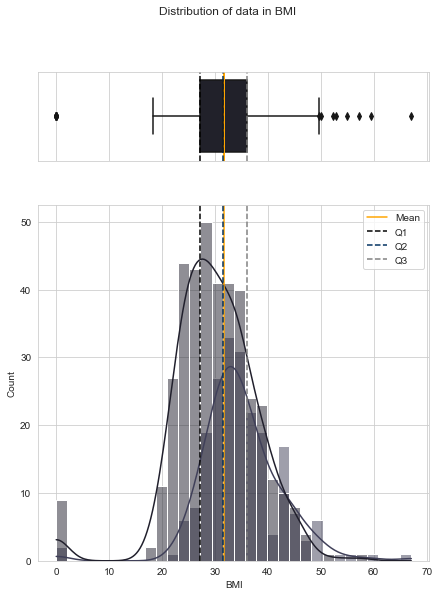

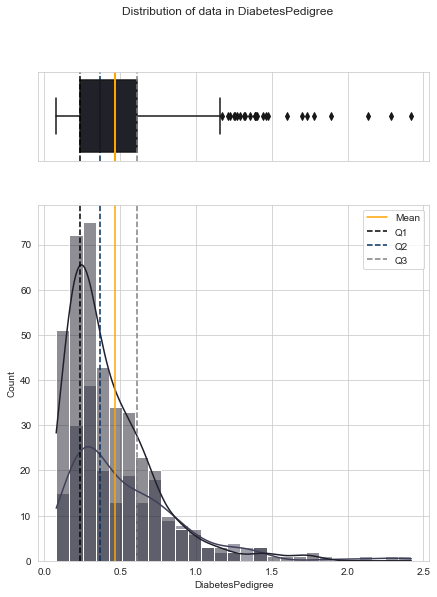

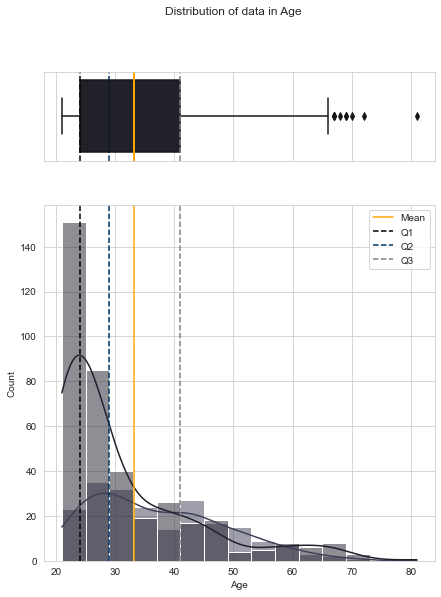

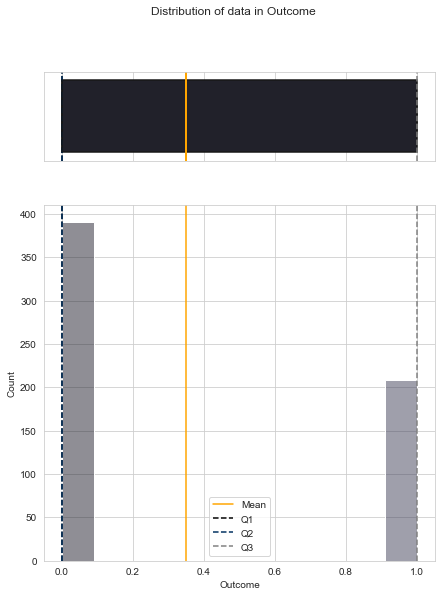

In [101]:
for col in strat_train_set.columns:
    create_box_hist(strat_train_set, col, 'Outcome')

In [102]:
replacements = {0: np.nan}
strat_train_set_ = strat_train_set.copy()
cols = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigree', 'Age']
for col in cols:
    strat_train_set_[col].replace(replacements, inplace=True)

info=pd.DataFrame(strat_train_set_.isna().sum()).T.rename(index={0:'Null values count'})
info

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome
Null values count,0,4,31,11,0,0,0


In [103]:
#strat_train_set_ = strat_train_set.dropna()
#info=pd.DataFrame(strat_train_set_.isna().sum()).T.rename(index={0:'Null values count'})
#info

In [104]:
feats = ["Glucose", "BloodPressure", "BMI"]
meds = []
for feat in feats:
    meds.append(strat_train_set_[feat].median())

def replace_with_median(ndf, feat, value):
    ndf[feat] = ndf[feat].replace(np.nan, value)
    
for i, feat in enumerate(feats):
    replace_with_median(strat_train_set_, feat, meds[i])
    replace_with_median(strat_train_set_, feat, meds[i])

info=pd.DataFrame(strat_train_set_.isna().sum()).T.rename(index={0:'Null values count'})
info

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome
Null values count,0,0,0,0,0,0,0


In [105]:
def get_num_outliers (df,column):
    q1 = df[column].quantile(0.25)
    q3 =  df[column].quantile(0.75)
    iqr = q3-q1
    return sum(( df[column]< (q1-1.5*iqr)) | ( df[column]>q3+(1.5*iqr)))
    
outliers = []
for col in strat_train_set_.columns:
    outliers.append(get_num_outliers(strat_train_set_,col))
pd.DataFrame(list(zip(strat_train_set_.columns, outliers))).sort_values(1,ascending=True)

,0,1
6,Outcome,0
1,Glucose,1
0,Pregnancies,4
5,Age,9
2,BloodPressure,10
3,BMI,10
4,DiabetesPedigree,25


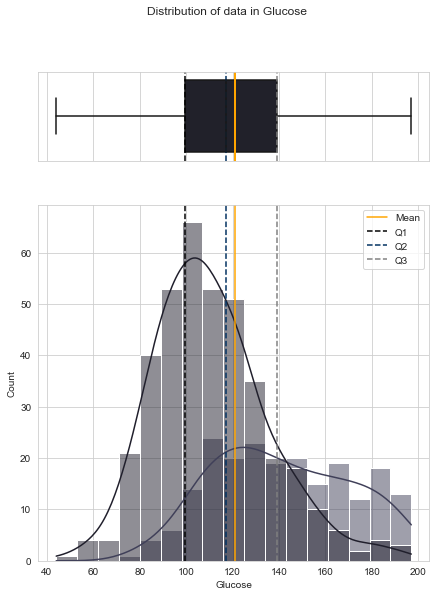

In [106]:
df_glu = delete_outliers('Glucose', strat_train_set_)
create_box_hist(df_glu, 'Glucose', 'Outcome')

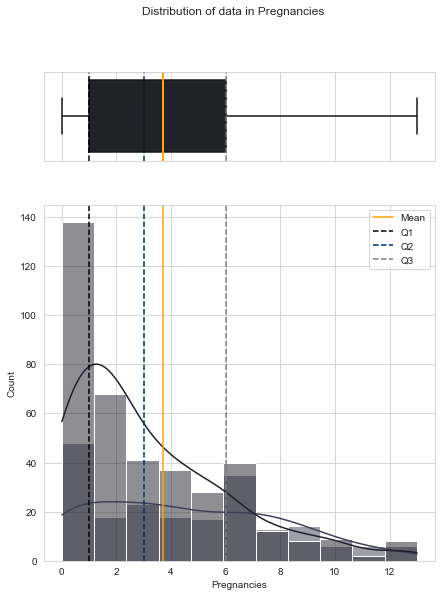

In [107]:
df_preg = delete_outliers('Pregnancies', df_glu)
create_box_hist(df_preg, 'Pregnancies', 'Outcome')

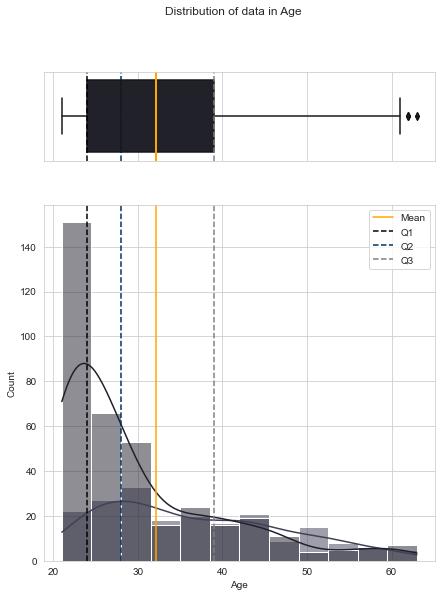

In [108]:
df_age = delete_outliers('Age', df_preg)
create_box_hist(df_age, 'Age', 'Outcome')

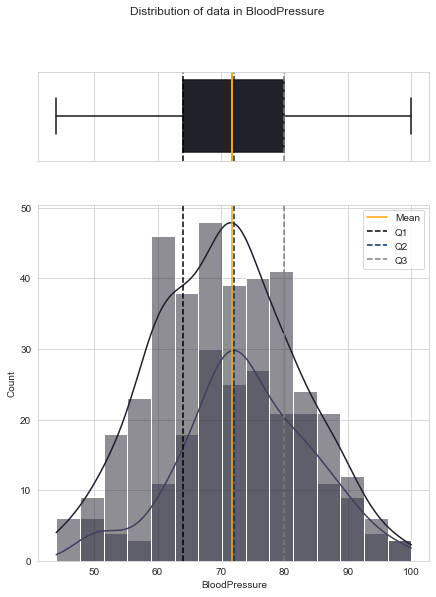

In [109]:
df_BP = delete_outliers('BloodPressure', df_age)
create_box_hist(df_BP, 'BloodPressure', 'Outcome')

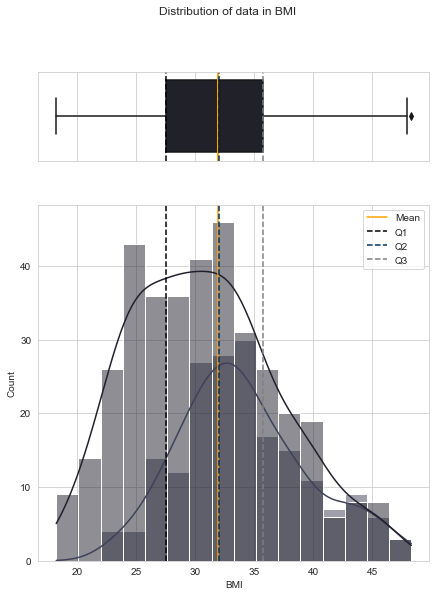

In [110]:
df_bmi = delete_outliers('BMI', df_BP)
create_box_hist(df_bmi, 'BMI', 'Outcome')

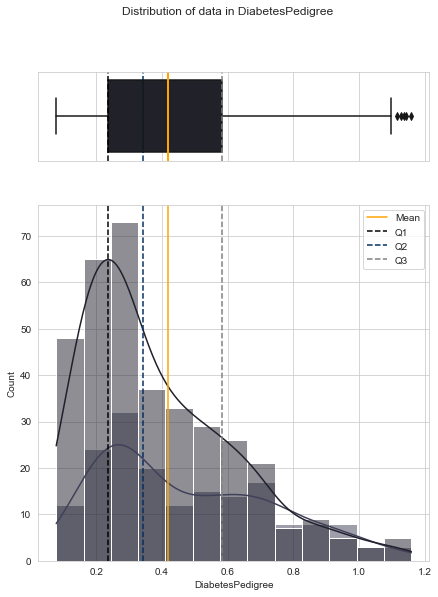

In [111]:
X_train_ = delete_outliers('DiabetesPedigree', df_bmi)
create_box_hist(X_train_, 'DiabetesPedigree', 'Outcome')

In [112]:
from sklearn.feature_selection import RFE

X_train = strat_train_set_.drop(columns="Outcome")
y_train = strat_train_set_["Outcome"]

X_test = strat_test_set.drop(columns="Outcome")
y_test = strat_test_set["Outcome"]

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
acc = accuracy_score(y_test, yhat)

print('Accuracy: %.3f' % acc)

Accuracy: 0.767


In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


decision_tree = DecisionTreeClassifier(random_state=3)
decision_tree = decision_tree.fit(X_train, y_train)
yhat = decision_tree.predict(X_test)
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

#tree.plot_tree(decision_tree, feature_names=x.columns)

Accuracy: 0.693


In [114]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
yhat = gnb.predict(X_test)
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.760


In [115]:
preds = pd.read_csv("ToPredict.csv")
preds = preds.drop(['Insulin', 'SkinThickness'], axis = 1)

ypreds_lr = lr.predict(preds)
print(ypreds_lr)

[1 0 0 1 1]


In [92]:
print(lr.predict_proba(preds))

[[0.48607231 0.51392769]
 [0.7353125  0.2646875 ]
 [0.89337804 0.10662196]
 [0.26100136 0.73899864]
 [0.2780543  0.7219457 ]]


In [ ]:
ypreds_dct = decision_tree.predict(preds)
print(ypreds_dct)

[1 0 0 1 0]


In [ ]:
ypreds_gnb = gnb.predict(preds)
print(ypreds_gnb)

[1 0 0 1 1]


## Method 4 (BEST)

In [ ]:
df = pd.read_csv("PimaDiabetes.csv")

In [ ]:
replacements = {0: np.nan}
df_copy = df.copy()
df_copy['SkinThickness'].replace(replacements, inplace=True)
df_copy['Glucose'].replace(replacements, inplace=True)
df_copy['BloodPressure'].replace(replacements, inplace=True)
df_copy['Insulin'].replace(replacements, inplace=True)
df_copy['BMI'].replace(replacements, inplace=True)

info=pd.DataFrame(df_copy.isna().sum()).T.rename(index={0:'Null values count'})
info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Null values count,0,5,35,221,362,11,0,0,0


In [ ]:
grouped_ = df_copy.groupby(["Outcome"]).median().reset_index()
grouped_

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,0,2.0,107.0,70.0,27.0,102.5,30.10,0.3375,27.0
1,1,4.0,140.0,74.5,32.0,169.5,34.25,0.4535,36.0


In [ ]:
grouped__ = df_copy.groupby(["Outcome"]).mean().reset_index()
grouped__

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,0,3.281633,110.685832,70.866242,27.118980,130.823077,30.853222,0.432278,31.181633
1,1,4.903846,142.050388,75.241803,32.920455,205.234375,35.383333,0.551315,36.907692


In [ ]:
#df_copy.loc[(df_copy['Outcome'] == 0 ) & (df_copy['SkinThickness'].isnull()), 'SkinThickness'] = 27
#df_copy.loc[(df_copy['Outcome'] == 1 ) & (df_copy['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [ ]:
#df_copy.loc[(df_copy['Outcome'] == 0 ), 'SkinThickness'].median()

In [ ]:
df_but_preg = df_copy.drop(['Pregnancies'], axis=1)
for i in df_but_preg.columns:
    for j in (0,1):
        df_copy.loc[(df_copy['Outcome'] == j) & (df_copy[i].isnull()), i] = df_copy.loc[(df_copy['Outcome'] == j ), i].median()

info=pd.DataFrame(df_copy.isna().sum()).T.rename(index={0:'Null values count'})
info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Null values count,0,0,0,0,0,0,0,0,0


In [ ]:
def get_num_outliers (df,column):
    q1 = df[column].quantile(0.25)
    q3 =  df[column].quantile(0.75)
    iqr = q3-q1
    return sum(( df[column]< (q1-1.5*iqr)) | ( df[column]>q3+(1.5*iqr)))
    
outliers = []
for col in df_copy.columns:
    outliers.append(get_num_outliers(df_copy,col))
pd.DataFrame(list(zip(df_copy.columns, outliers))).sort_values(1,ascending=True)

,0,1
1,Glucose,0
8,Outcome,0
3,SkinThickness,3
0,Pregnancies,4
5,BMI,8
7,Age,12
2,BloodPressure,14
4,Insulin,24
6,DiabetesPedigree,29


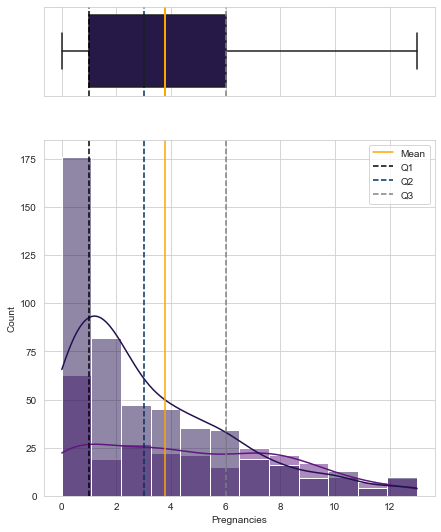

In [ ]:
def delete_outliers(col,df):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower, upper = Q1 - (1.5*IQR), Q3 + (1.5*IQR)
    new_df = df[(df[col] < upper) & (df[col] > lower)]
    return new_df
    
df_preg = delete_outliers('Pregnancies', df_copy)
create_box_hist(df_preg, 'Pregnancies', 'Outcome')

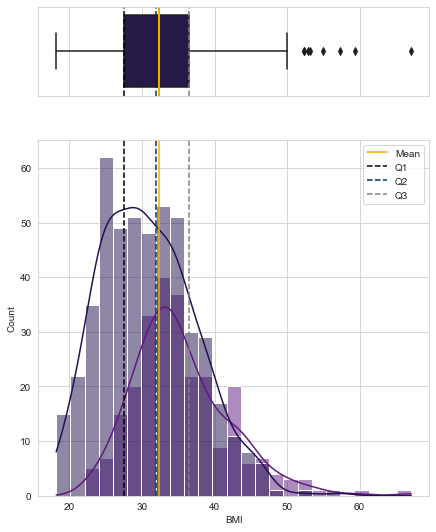

In [ ]:
create_box_hist(df_preg, 'BMI', 'Outcome')

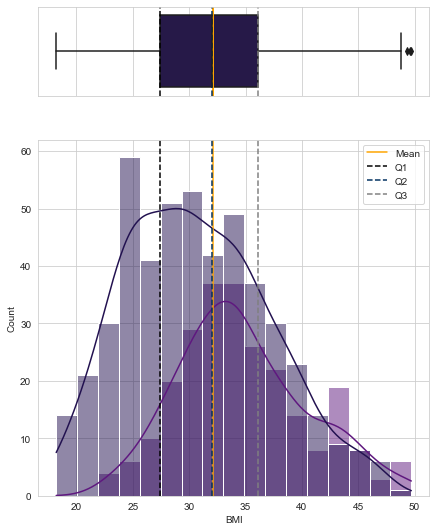

In [ ]:
df_BMI = delete_outliers('BMI', df_preg)
create_box_hist(df_BMI, 'BMI', 'Outcome')

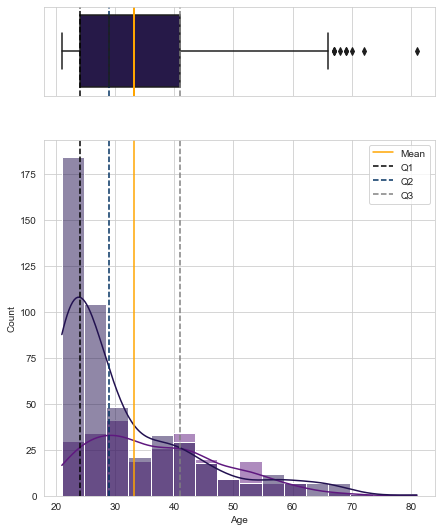

In [ ]:
create_box_hist(df_BMI, 'Age', 'Outcome')

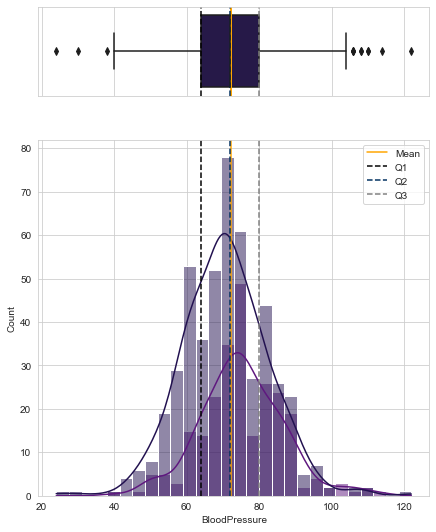

In [ ]:
create_box_hist(df_BMI, 'BloodPressure', 'Outcome')

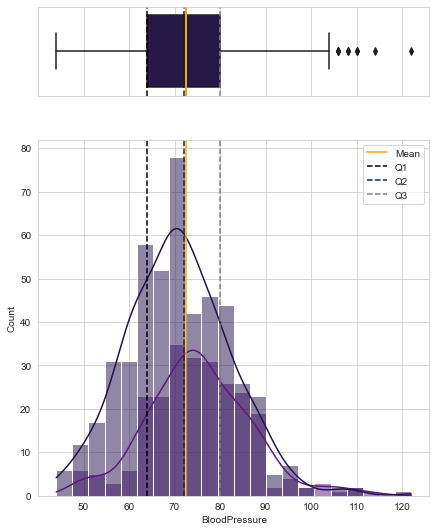

In [ ]:
df_BP = df_BMI.copy()

Q3 = np.percentile(df_BP['BloodPressure'], 75)
Q1 = np.percentile(df_BP['BloodPressure'], 25)
IQR = Q3 - Q1
lower = Q1 - (1.5*IQR)
df_BP = df_BP[df_BP['BloodPressure'] > lower]
create_box_hist(df_BP, 'BloodPressure', 'Outcome')

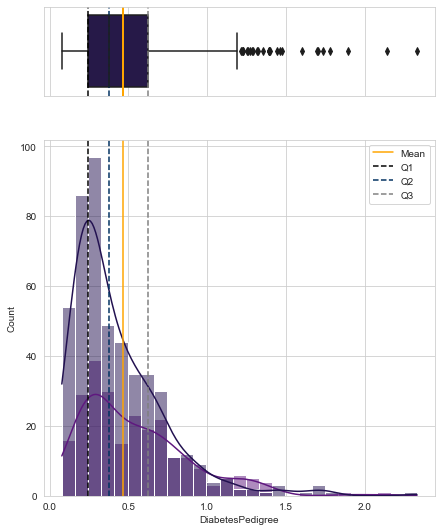

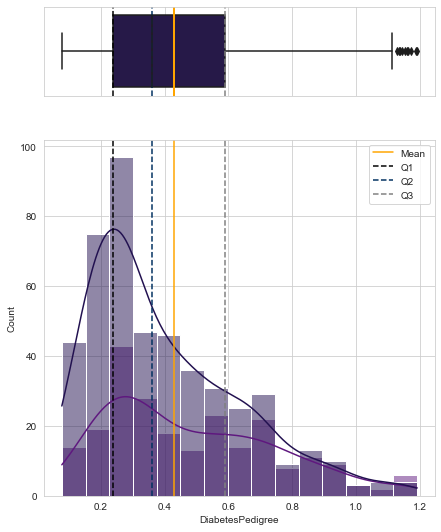

In [ ]:
create_box_hist(df_BP, 'DiabetesPedigree', 'Outcome')
df_dpf = delete_outliers('DiabetesPedigree', df_BP)
create_box_hist(df_dpf, 'DiabetesPedigree', 'Outcome')

#create_box_hist(df_BMI, 'DiabetesPedigree', 'Outcome')
#df_dpf = delete_outliers('DiabetesPedigree', df_BMI)
#create_box_hist(df_dpf, 'DiabetesPedigree', 'Outcome')

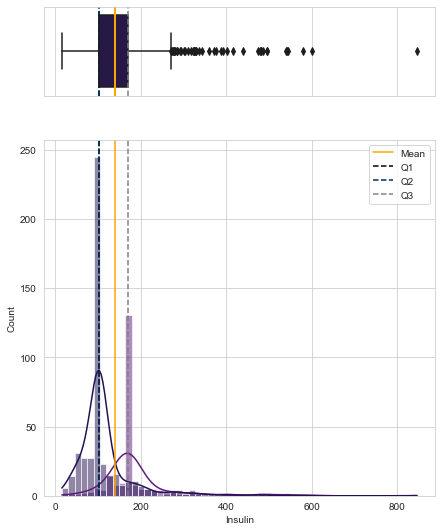

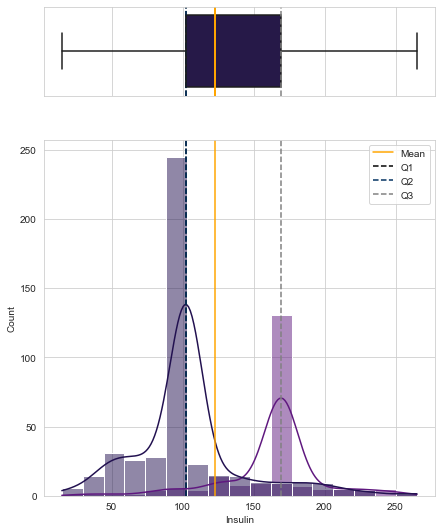

In [ ]:
create_box_hist(df_dpf, 'Insulin', 'Outcome')
df_ins = delete_outliers('Insulin', df_dpf)
create_box_hist(df_ins, 'Insulin', 'Outcome')

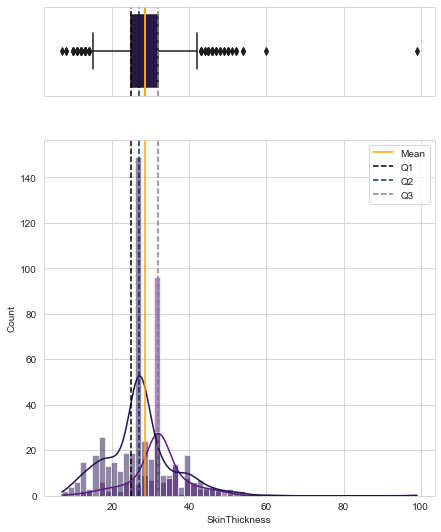

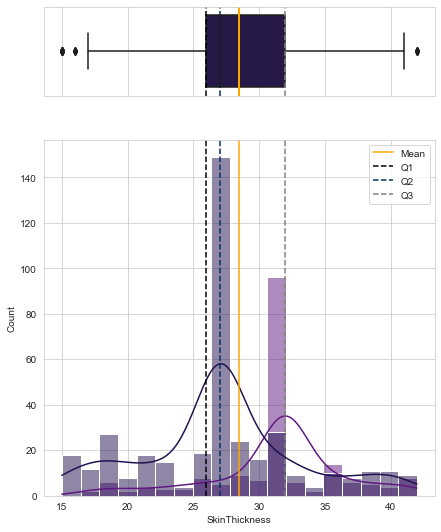

In [ ]:
create_box_hist(df_ins, 'SkinThickness', 'Outcome')
df = delete_outliers('SkinThickness', df_ins)
create_box_hist(df, 'SkinThickness', 'Outcome')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
745,12,100.0,84.0,33.0,105.0,30.0,0.488,46,0
746,1,147.0,94.0,41.0,169.5,49.3,0.358,27,1
747,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop(columns="Outcome")
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
acc = accuracy_score(y_test, yhat)

print('Accuracy: %.3f' % acc)

Accuracy: 0.899


In [ ]:
lr.intercept_

array([-12.371])

In [ ]:
lr.coef_

array([[ 0.089,  0.031, -0.001,  0.065,  0.03 ,  0.05 , -0.143,  0.   ]])

In [ ]:
preds = pd.read_csv('ToPredict.csv')

display(preds)
y_preds = lr.predict(preds)
y_preds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,4,136,70,0,0,31.2,1.182,22
1,1,121,78,39,74,39.0,0.261,28
2,3,108,62,24,0,26.0,0.223,25
3,0,181,88,44,510,43.3,0.222,26
4,8,154,78,32,0,32.4,0.443,45


array([0, 0, 0, 1, 0], dtype=int64)

In [ ]:
ytrain = lr.predict(X_train)
acc2 = accuracy_score(ytrain, y_train)

print(acc2)

0.8484162895927602


Feature Ranking with 1 feature(s) used is:[1 4 6 3 5 2 7 8]
Feature Ranking with 2 feature(s) used is:[1 3 5 2 4 1 6 7]
Feature Ranking with 3 feature(s) used is:[1 2 4 1 3 1 5 6]
Feature Ranking with 4 feature(s) used is:[1 1 3 1 2 1 4 5]
Feature Ranking with 5 feature(s) used is:[1 1 2 1 1 1 3 4]
Feature Ranking with 6 feature(s) used is:[1 1 1 1 1 1 2 3]
Feature Ranking with 7 feature(s) used is:[1 1 1 1 1 1 1 2]
Feature Ranking with 8 feature(s) used is:[1 1 1 1 1 1 1 1]


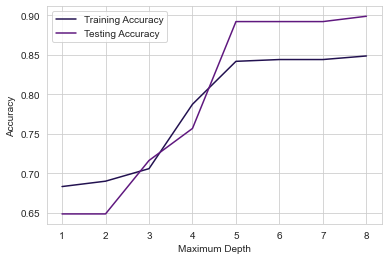

In [ ]:
from sklearn.feature_selection import RFE

train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model
for i in range(1,len(df.columns)):
    rfe = RFE(estimator=LogisticRegression(),n_features_to_select=i, verbose=0)
    rfe.fit(X_train,y_train)
    train_accs.append(accuracy_score(y_train, rfe.predict(X_train)))
    test_accs.append(accuracy_score(y_test, rfe.predict(X_test)))
    print("Feature Ranking with {} feature(s) used is:{}".format(i, rfe.ranking_))
x_axs2 = np.arange(1,len(df.columns)) # Create domain for plot
plt.plot(x_axs2, train_accs, label='Training Accuracy') # Plot training error over domain
plt.plot(x_axs2, test_accs, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

Feature used: Pregnancies, Glucose, SkinThickness, Insulin, BMI

Accuracy with 1 features: 0.9054054054054054
Accuracy with 2 features: 0.8648648648648649
Accuracy with 3 features: 0.8716216216216216
Accuracy with 4 features: 0.8851351351351351
Accuracy with 5 features: 0.8851351351351351
Accuracy with 6 features: 0.8851351351351351
Accuracy with 7 features: 0.8918918918918919
Accuracy with 8 features: 0.8986486486486487
[ 13.069 138.938  16.804  43.996 232.865  44.619   7.059  16.505]


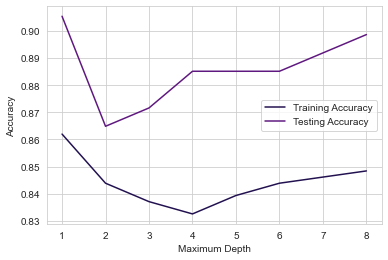

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model
for i in range(1,len(df.columns)):
    test = SelectKBest(score_func=f_classif, k=i)
    fit = test.fit(X_train, y_train)
    set_printoptions(precision=3)
    features = fit.transform(X_train)

    lr1 = LogisticRegression().fit(features, y_train)
    pred_x = fit.transform(X_test)
    hat_y = lr1.predict(pred_x)
    acc_lr = accuracy_score(hat_y, y_test)
    train_accs.append(accuracy_score(y_train, lr1.predict(features)))
    test_accs.append(accuracy_score(y_test, lr1.predict(pred_x)))
    print("Accuracy with {} features: {}".format(i,acc_lr))    
print(fit.scores_)

x_axs2 = np.arange(1,len(df.columns)) # Create domain for plot
plt.plot(x_axs2, train_accs, label='Training Accuracy') # Plot training error over domain
plt.plot(x_axs2, test_accs, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

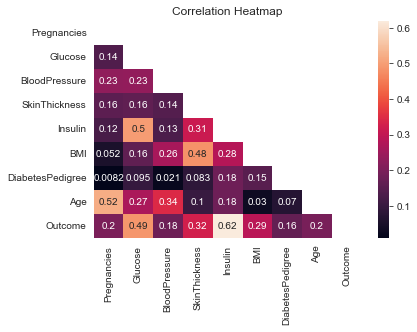

In [ ]:
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
ax = sns.heatmap(df.corr(), annot=True, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

## Method 5 (drop insulin)

In [ ]:
df = pd.read_csv("PimaDiabetes.csv")
replacements = {0: np.nan}
df_copy = df.copy()
df_copy['SkinThickness'].replace(replacements, inplace=True)
df_copy['Glucose'].replace(replacements, inplace=True)
df_copy['BloodPressure'].replace(replacements, inplace=True)
df_copy['Insulin'].replace(replacements, inplace=True)
df_copy['BMI'].replace(replacements, inplace=True)

info=pd.DataFrame((df_copy.isna().sum())/len(df_copy)*100).T.rename(index={0:'Null values (%)'})
info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Null values (%),0.0,0.666667,4.666667,29.466667,48.266667,1.466667,0.0,0.0,0.0


In [ ]:
df_copy = df_copy.drop(['Insulin'], axis=1)
for i in df_copy.columns:
    for j in (0,1):
        df_copy.loc[(df_copy['Outcome'] == j) & (df_copy[i].isnull()), i] = df_copy.loc[(df_copy['Outcome'] == j ), i].median()

info=pd.DataFrame(df_copy.isna().sum()).T.rename(index={0:'Null values count'})
info

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigree,Age,Outcome
Null values count,0,0,0,0,0,0,0,0


In [ ]:
def get_num_outliers (df,column):
    q1 = df[column].quantile(0.25)
    q3 =  df[column].quantile(0.75)
    iqr = q3-q1
    return sum(( df[column]< (q1-1.5*iqr)) | ( df[column]>q3+(1.5*iqr)))
    
outliers = []
for col in df_copy.columns:
    outliers.append(get_num_outliers(df_copy,col))
pd.DataFrame(list(zip(df_copy.columns, outliers))).sort_values(1,ascending=True)

,0,1
1,Glucose,0
7,Outcome,0
0,Pregnancies,4
4,BMI,8
6,Age,12
2,BloodPressure,14
5,DiabetesPedigree,29
3,SkinThickness,85


In [ ]:
def delete_outliers(col,df):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower, upper = Q1 - (1.5*IQR), Q3 + (1.5*IQR)
    new_df = df[(df[col] < upper) & (df[col] > lower)]
    return new_df
    
df_temp = delete_outliers('Pregnancies', df_copy)
df_temp = delete_outliers('BMI', df_temp)
df_temp = delete_outliers('Age', df_temp)
df_temp = delete_outliers('DiabetesPedigree', df_temp)
df_temp = delete_outliers('SkinThickness', df_temp)

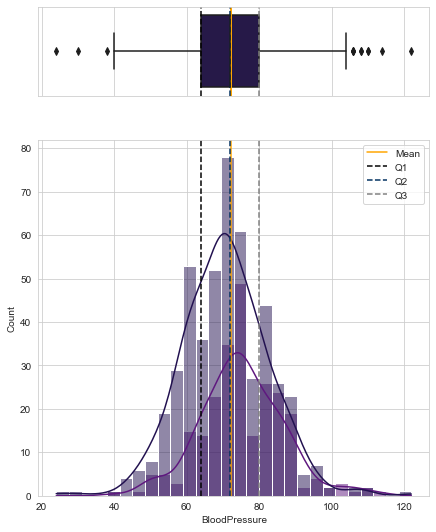

In [ ]:
create_box_hist(df_bmi, 'BloodPressure', 'Outcome')

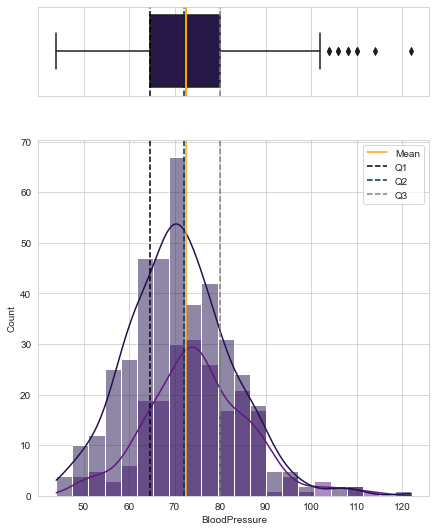

In [ ]:
Q3 = np.percentile(df_temp['BloodPressure'], 75)
Q1 = np.percentile(df_temp['BloodPressure'], 25)
IQR = Q3 - Q1
lower = Q1 - (1.5*IQR)
df_temp = df_temp[df_temp['BloodPressure'] > lower]
create_box_hist(df_temp, 'BloodPressure', 'Outcome')

In [ ]:
df_temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
745,12,100.0,84.0,33.0,30.0,0.488,46,0
746,1,147.0,94.0,41.0,49.3,0.358,27,1
747,1,81.0,74.0,41.0,46.3,1.096,32,0
748,3,187.0,70.0,22.0,36.4,0.408,36,1


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_temp.drop(columns="Outcome")
y = df_temp["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
acc = accuracy_score(y_test, yhat)

print('Accuracy: %.3f' % acc)

Accuracy: 0.832


In [ ]:
preds = pd.read_csv('ToPredict.csv').drop(['Insulin'], axis=1)

display(preds)
y_preds = lr.predict(preds)
y_preds

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigree,Age
0,4,136,70,0,31.2,1.182,22
1,1,121,78,39,39.0,0.261,28
2,3,108,62,24,26.0,0.223,25
3,0,181,88,44,43.3,0.222,26
4,8,154,78,32,32.4,0.443,45


array([0, 0, 0, 1, 1], dtype=int64)

In [ ]:
yhat = lr.predict(X_train)
acc = accuracy_score(y_train, yhat)

print('Accuracy: %.3f' % acc)

Accuracy: 0.848


Feature Ranking with 1 feature(s) used is:[2 5 7 3 4 1 6]
Feature Ranking with 2 feature(s) used is:[1 4 6 2 3 1 5]
Feature Ranking with 3 feature(s) used is:[1 3 5 1 2 1 4]
Feature Ranking with 4 feature(s) used is:[1 2 4 1 1 1 3]
Feature Ranking with 5 feature(s) used is:[1 1 3 1 1 1 2]
Feature Ranking with 6 feature(s) used is:[1 1 2 1 1 1 1]
Feature Ranking with 7 feature(s) used is:[1 1 1 1 1 1 1]


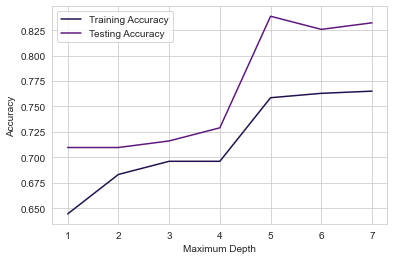

In [ ]:
from sklearn.feature_selection import RFE

train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model
for i in range(1,len(df_temp.columns)):
    rfe = RFE(estimator=LogisticRegression(),n_features_to_select=i, verbose=0)
    rfe.fit(X_train,y_train)
    train_accs.append(accuracy_score(y_train, rfe.predict(X_train)))
    test_accs.append(accuracy_score(y_test, rfe.predict(X_test)))
    print("Feature Ranking with {} feature(s) used is:{}".format(i, rfe.ranking_))
x_axs2 = np.arange(1,len(df_temp.columns)) # Create domain for plot
plt.plot(x_axs2, train_accs, label='Training Accuracy') # Plot training error over domain
plt.plot(x_axs2, test_accs, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph